# 미니프로젝트

In [1]:
import requests
from tqdm import tqdm
import pandas as pd
import numpy as np
import time
import my_utils_PJ as mu
import math
import random
import imp
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.graph_objs as go
import plotly.express as px
imp.reload(mu)
tqdm.pandas()

C:\Users\user\AppData\Local\Temp\ipykernel_9356\3262907889.py:9: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  import imp


In [2]:
# 폰트 조정
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/gulim.ttc"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font) # 윈도우

# 확률 구하기

In [628]:
sql_conn = mu.connect_mysql('icia')
df = pd.DataFrame(mu.mysql_execute_dict('select * from lol_mini', sql_conn))
sql_conn.close()

In [629]:
winrate= df[['gameId','teamId','win','firstChampion','firstDragon','firstTower']]

In [630]:
# 퍼블 퍼드 포블일 경우 승률
fb_fd_ft=winrate[(winrate['firstChampion']=='True')&(winrate['firstDragon']=='True')&(winrate['firstTower']=='True')]
len(fb_fd_ft)
round(len(fb_fd_ft[fb_fd_ft['win']=='True'])/len(fb_fd_ft)*100,2)

85.4

In [631]:
# 퍼블 퍼드일 경우 승률
fb_fd=winrate[(winrate['firstChampion']=='True')&(winrate['firstDragon']=='True')]
len(fb_fd)
round(len(fb_fd[fb_fd['win']=='True'])/len(fb_fd)*100,2)

72.71

In [632]:
# 퍼블 포블일 경우 승률
fb_ft=winrate[(winrate['firstChampion']=='True')&(winrate['firstTower']=='True')]
len(fb_ft)
round(len(fb_ft[fb_ft['win']=='True'])/len(fb_ft)*100,2)

78.56

In [633]:
# 퍼드 포블일 경우 승률
fd_ft=winrate[(winrate['firstDragon']=='True')&(winrate['firstTower']=='True')]
len(fd_ft)
round(len(fd_ft[fd_ft['win']=='True'])/len(fd_ft)*100,2)

82.77

In [634]:
# 퍼블 승률
fb=winrate[winrate['firstChampion']=='True']
round(len(fb[fb['win']=='True'])/len(fb)*100,2)

60.23

In [635]:
# 퍼드 승률
fd=winrate[winrate['firstDragon']=='True']
round(len(fd[fd['win']=='True'])/len(fd)*100,2)

65.32

In [636]:
# 포블 승률
ft=winrate[winrate['firstTower']=='True']
round(len(ft[ft['win']=='True'])/len(ft)*100,2)

74.62

In [637]:
win_cnt=winrate[winrate['win']=='True']
fc_cnt=win_cnt.groupby(['firstChampion'])[['win']].count()
fc_cnt['rate']=round(fc_cnt.win/fc_cnt.sum().win*100,2)
fc_cnt

win   rate
firstChampion              
False          20210  39.78
True           30600  60.22

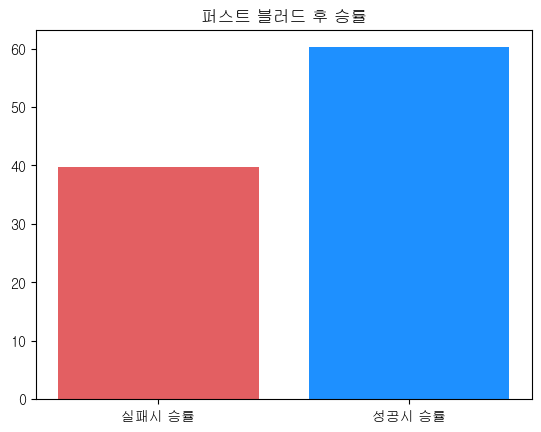

In [638]:
fc_rate=[]
for i in range(len(fc_cnt)):
    fc_rate.append(fc_cnt.iloc[i]['rate'])
fc_win=[]
for i in range(len(fc_cnt)):
    if fc_cnt.index[i]=='True':
        fc_win.append('성공시 승률')
    else:
        fc_win.append('실패시 승률')

plt.figure()
x = np.arange(2)
plt.title('퍼스트 블러드 후 승률')
plt.bar(x, fc_rate, color=['#e35f62','dodgerblue'])
plt.xticks(x, fc_win)
plt.show()

In [639]:
win_cnt=winrate[winrate['win']=='True']
fd_cnt=win_cnt.groupby(['firstDragon'])[['win']].count()
fd_cnt['rate']=round(fd_cnt.win/fd_cnt.sum().win*100,2)
fd_cnt

win   rate
firstDragon              
False        17700  34.84
True         33110  65.16

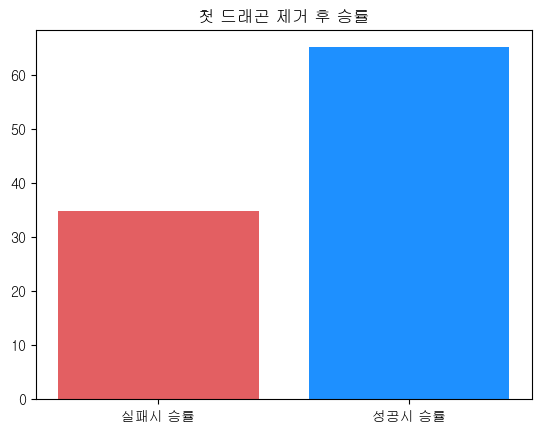

In [640]:
fd_rate=[]
for i in range(len(fd_cnt)):
    fd_rate.append(fd_cnt.iloc[i]['rate'])
fd_win=[]
for i in range(len(fd_cnt)):
    if fd_cnt.index[i]=='True':
        fd_win.append('성공시 승률')
    else:
        fd_win.append('실패시 승률')

plt.figure()
x = np.arange(2)
plt.title('첫 드래곤 제거 후 승률')
plt.bar(x, fd_rate, color=['#e35f62','dodgerblue'])
plt.xticks(x, fd_win)
plt.show()

In [641]:
win_cnt=winrate[winrate['win']=='True']
ft_cnt=win_cnt.groupby(['firstTower'])[['win']].count()
ft_cnt['rate']=round(ft_cnt.win/ft_cnt.sum().win*100,2)
ft_cnt

win   rate
firstTower              
False       12935  25.46
True        37875  74.54

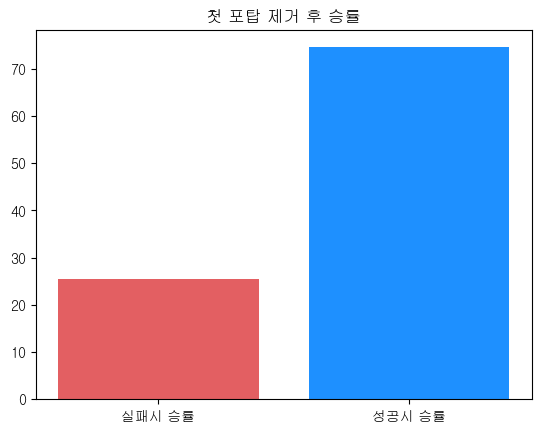

In [642]:
ft_rate=[]
for i in range(len(ft_cnt)):
    ft_rate.append(ft_cnt.iloc[i]['rate'])
ft_win=[]
for i in range(len(ft_cnt)):
    if ft_cnt.index[i]=='True':
        ft_win.append('성공시 승률')
    else:
        ft_win.append('실패시 승률')

plt.figure()
x = np.arange(2)
plt.title('첫 포탑 제거 후 승률')
plt.bar(x, ft_rate, color=['#e35f62','dodgerblue'])
plt.xticks(x, ft_win)
plt.show()

In [643]:
tot_cnt = win_cnt.groupby(['firstChampion','firstDragon','firstTower'])[['win']].count()
tot_cnt['rate']=round(tot_cnt.win/tot_cnt.sum().win*100,2)
tot_cnt2 = tot_cnt.sort_values(by=['rate'], ascending=False)

In [644]:
lst=[]
rate_lst=[]
for i in range(len(tot_cnt2)):
    rate_lst.append(tot_cnt2.iloc[i]['rate'])
for i in range(len(tot_cnt2)):
    if tot_cnt2.index[i]==('False', 'False', 'False') :
        lst.append('없음')
    elif tot_cnt2.index[i]==('False', 'False', 'True') :
        lst.append('포탑')
    elif tot_cnt2.index[i]==('False', 'True', 'False') :
        lst.append('용')
    elif tot_cnt2.index[i]==('False', 'True', 'True') :
        lst.append('용&포탑')
    elif tot_cnt2.index[i]==('True', 'False', 'False') :
        lst.append('퍼블')
    elif tot_cnt2.index[i]==('True', 'False', 'True') :
        lst.append('퍼블&포탑')
    elif tot_cnt2.index[i]==('True', 'True', 'False') :
        lst.append('퍼블&용')
    else :
        lst.append('퍼블&용&포탑')

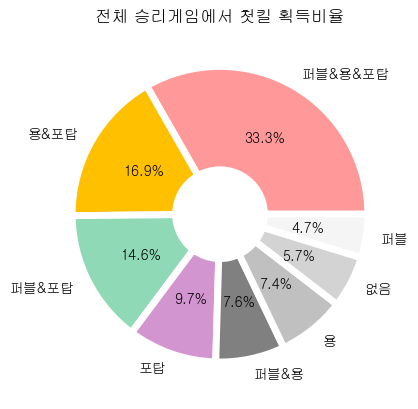

In [645]:
colors = ['#ff9999', '#ffc000', '#8fd9b6', '#d395d0','gray', 'silver', 'lightgray', 'whitesmoke']
plt.pie(rate_lst, labels = lst, autopct='%1.1f%%',colors=colors, wedgeprops=wedgeprops)
plt.grid(True)
plt.title('전체 승리게임에서 첫킬 획득비율')
plt.show()

In [646]:
# win bool값을 int로 변경
winrate2 = winrate.copy()
winrate2['win']=winrate2['win'].apply(lambda x:1 if x=='True' else 0)
#winrate2['firstChampion']=winrate2['firstChampion'].apply(lambda x:1 if x=='True' else 0)
#winrate2['firstDragon']=winrate2['firstDragon'].apply(lambda x:1 if x=='True' else 0)
#winrate2['firstTower']=winrate2['firstTower'].apply(lambda x:1 if x=='True' else 0)

In [647]:
win_sum = winrate2.groupby(['firstChampion','firstDragon','firstTower'])[['win']].sum()
win_count = winrate2.groupby(['firstChampion','firstDragon','firstTower'])[['win']].count().rename(columns={'win':'gameCount'})
cnt_win_df = pd.merge(win_sum,win_count,on=['firstChampion','firstDragon','firstTower'])
cnt_win_df['winrate']=round(cnt_win_df.win/cnt_win_df.gameCount*100,2)
cnt_win_df.sort_values(by=['winrate'], ascending=False,inplace=True)

In [648]:
rate_lst2=[]
lst2=[]

for i in range(len(cnt_win_df)):
    rate_lst2.append(cnt_win_df.iloc[i]['winrate'])

for i in range(len(cnt_win_df)):
    if cnt_win_df.index[i]==('False', 'False', 'False') :
        lst2.append('없음')
    elif cnt_win_df.index[i]==('False', 'False', 'True') :
        lst2.append('포탑')
    elif cnt_win_df.index[i]==('False', 'True', 'False') :
        lst2.append('용')
    elif cnt_win_df.index[i]==('False', 'True', 'True') :
        lst2.append('용&포탑')
    elif cnt_win_df.index[i]==('True', 'False', 'False') :
        lst2.append('퍼블')
    elif cnt_win_df.index[i]==('True', 'False', 'True') :
        lst2.append('퍼블&포탑')
    elif cnt_win_df.index[i]==('True', 'True', 'False') :
        lst2.append('퍼블&용')
    else :
        lst2.append('퍼블&용&포탑')
rate_lst2

[85.4, 78.04, 66.46, 56.41, 43.96, 33.9, 21.8, 14.56]

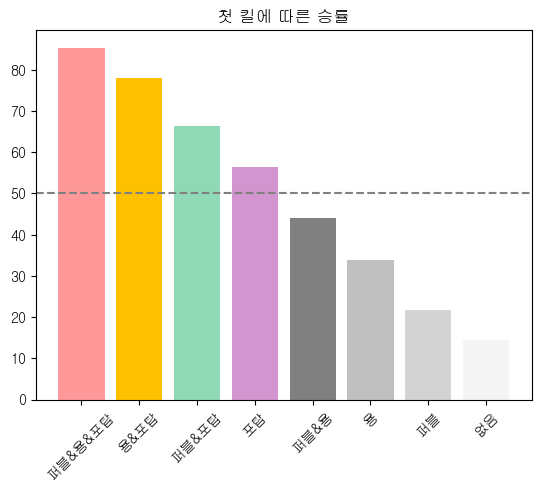

In [649]:
colors = ['#ff9999', '#ffc000', '#8fd9b6', '#d395d0','gray', 'silver', 'lightgray', 'whitesmoke']
x = np.arange(len(cnt_win_df))
plt.title('첫 킬에 따른 승률')
plt.bar(x, rate_lst2,color=colors)
plt.xticks(x, lst2, rotation=45)
mean_val = cnt_win_df.winrate.mean()
plt.axhline(y=mean_val, color = 'gray', linestyle = 'dashed')

plt.show()

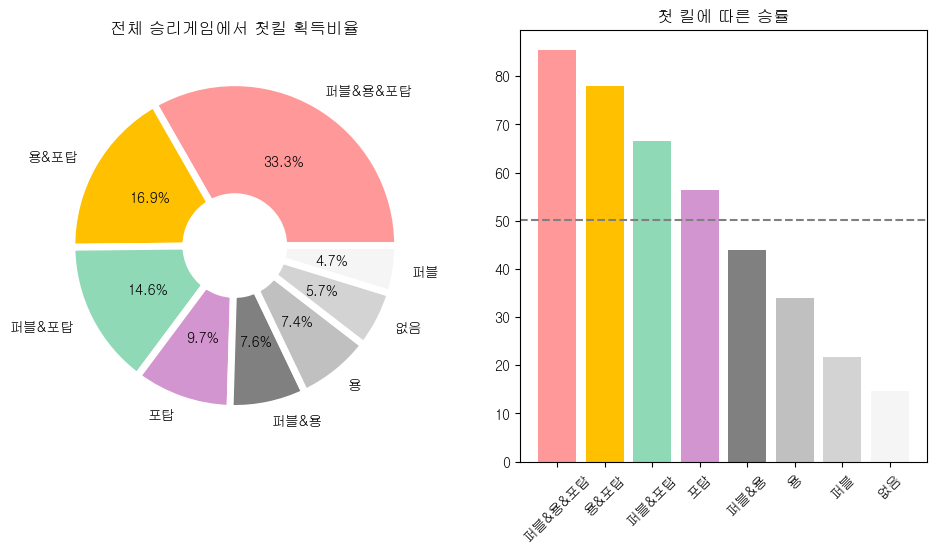

In [650]:
plt.subplots_adjust(left=0.1, bottom=0.1,  right=1.5, top=1)

wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}
x = np.arange(len(tot_cnt2))
colors = ['#ff9999', '#ffc000', '#8fd9b6', '#d395d0','gray', 'silver', 'lightgray', 'whitesmoke']

plt.subplot(1, 2, 1)

plt.pie(rate_lst, labels = lst, autopct='%1.1f%%',colors=colors, wedgeprops=wedgeprops)
plt.grid(True)
plt.title('전체 승리게임에서 첫킬 획득비율')

plt.subplot(1, 2, 2)
plt.bar(x, rate_lst2,color=colors)
plt.xticks(x, lst2, rotation=45)
plt.title('첫 킬에 따른 승률')
mean_val = cnt_win_df.winrate.mean()
plt.axhline(y=mean_val, color = 'gray', linestyle = 'dashed')

plt.show()

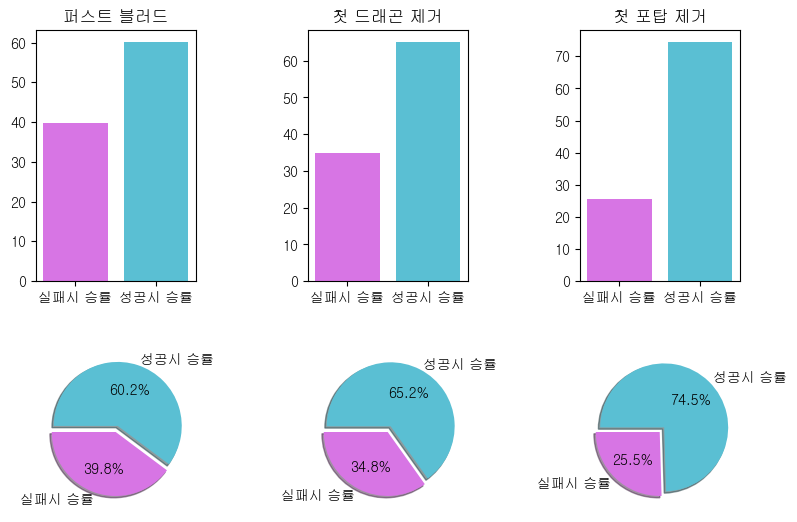

In [651]:
plt.subplots_adjust(left=0.1, bottom=0.1,  right=1.2, top=1.2, wspace=0.7, hspace=0.1)
color=['#D775E4','#5ABFD3']

plt.subplot(2, 3, 1)                # nrows=2, ncols=1, index=1
x = np.arange(2)
plt.title('퍼스트 블러드')
plt.bar(x, fc_rate, color=color)
plt.xticks(x, fc_win)

plt.subplot(2, 3, 2)                # nrows=2, ncols=1, index=2
plt.title('첫 드래곤 제거')
plt.bar(x, fd_rate, color=color)
plt.xticks(x, fd_win)

plt.subplot(2, 3, 3)                # nrows=2, ncols=1, index=2
plt.title('첫 포탑 제거')
plt.bar(x, ft_rate, color=color)
plt.xticks(x, ft_win)

plt.subplot(2, 3, 4)                # nrows=2, ncols=1, index=1
x = np.arange(2)
plt.pie(fc_rate, labels=fc_win, autopct='%.1f%%',startangle=180, explode=[0,0.1],shadow=True,colors=color)

plt.subplot(2, 3, 5)                # nrows=2, ncols=1, index=2
plt.pie(fd_rate, labels=fd_win, autopct='%.1f%%',startangle=180, explode=[0,0.1],shadow=True,colors=color)

plt.subplot(2, 3, 6)                # nrows=2, ncols=1, index=2
plt.pie(ft_rate, labels=ft_win, autopct='%.1f%%',startangle=180, explode=[0,0.1],shadow=True,colors=color)

plt.show()

In [652]:
fc_true = winrate[winrate['firstChampion']=='True']
fc_true['firstDragon']=fc_true['firstDragon'].apply(lambda x:1 if x=='True' else 0)
fc_true['firstTower']=fc_true['firstTower'].apply(lambda x:1 if x=='True' else 0)

true=fc_true[(fc_true['firstDragon']==1) & (fc_true['firstTower']==1)].groupby(['firstChampion'])[['firstDragon']].count()
false=fc_true[(fc_true['firstDragon']==0) & (fc_true['firstTower']==0)].groupby(['firstChampion'])[['firstDragon']].count()

fc_get = fc_true.groupby(['firstChampion'])[['firstDragon','firstTower']].sum()
fc_get['game_cnt']=fc_true.groupby(['firstChampion'])[['firstDragon']].count()
fc_get['fd_rate']=round(fc_get.firstDragon/fc_get.game_cnt*100,2)
fc_get['ft_rate']=round(fc_get.firstTower/fc_get.game_cnt*100,2)
fc_get['both_rate']=round(true.firstDragon/fc_get.game_cnt*100,2)
fc_get['nothing_rate']=round(false.firstDragon/fc_get.game_cnt*100,2)
fc_get['one_rate']=100-(fc_get['nothing_rate'])
fc_get.columns = ['퍼드', '포블', '총게임수','첫 드래곤','첫 포탑','모두 획득','모두 미획득','하나 이상 획득']

C:\Users\user\AppData\Local\Temp\ipykernel_9356\750946605.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\user\AppData\Local\Temp\ipykernel_9356\750946605.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [653]:
col=[]
for i in range(len(fc_get.columns[3:8])):
    col.append(fc_get.columns[3:8][i])
val=[]
for i in col:
    val.append(fc_get.iloc[0][i])

data = dict({'col':col,'val':val})
fig = px.funnel(data, x='val', y='col')
fig.show()

In [613]:
df

sepal_length  sepal_width  petal_length  petal_width    species  \
0             5.1          3.5           1.4          0.2     setosa   
1             4.9          3.0           1.4          0.2     setosa   
2             4.7          3.2           1.3          0.2     setosa   
3             4.6          3.1           1.5          0.2     setosa   
4             5.0          3.6           1.4          0.2     setosa   
..            ...          ...           ...          ...        ...   
145           6.7          3.0           5.2          2.3  virginica   
146           6.3          2.5           5.0          1.9  virginica   
147           6.5          3.0           5.2          2.0  virginica   
148           6.2          3.4           5.4          2.3  virginica   
149           5.9          3.0           5.1          1.8  virginica   

     species_id  
0             1  
1             1  
2             1  
3             1  
4             1  
..          ...  
145           3  
146           3  
147           3  
148           3  
149           3  

[150 rows x 6 columns]

In [581]:
tmp_df = df[['wardsPlaced', 'wardsKilled','kills', 'win']]
sort_win_df = tmp_df[tmp_df['win'] == 'True']
sort_lose_df = tmp_df[tmp_df['win'] == 'False']
sort_lose_df['win'].count()

39830

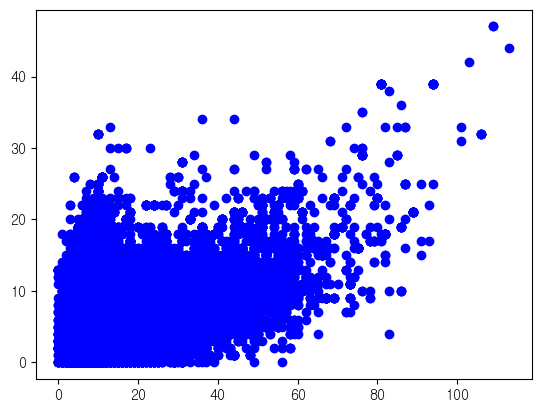

In [578]:
plt.figure()
xdata = sort_win_df['wardsPlaced']
ydata = sort_win_df['wardsKilled']
plt.plot(xdata, ydata, color='b', marker='o', linestyle='None')

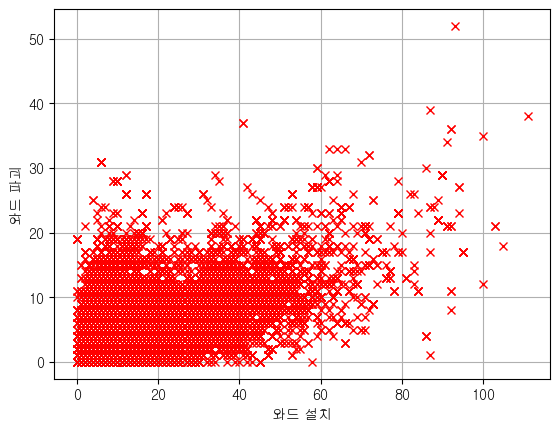

In [579]:

xdata2 = sort_lose_df['wardsPlaced']
ydata2 = sort_lose_df['wardsKilled']
plt.plot(xdata2, ydata2, color='r', marker='x', linestyle='None')
plt.xlabel('와드 설치')
plt.ylabel('와드 파괴')
plt.grid(True)

In [623]:
tmp=df.groupby(['gameId','teamId']).sum()

In [624]:
tmp

gameDuration  summonerLevel  participantId  \
gameId        teamId                                               
KR_6390308313 100             7105            725             15   
              200             7105           1321             40   
KR_6391207496 100             6710            998             15   
              200             6710           1385             40   
KR_6393366694 100             7815            787             15   
...                            ...            ...            ...   
KR_6415638366 200             6505           1113             40   
KR_6415638756 100             7430           1624             15   
              200             7430           1490             40   
KR_6415644063 100             9805           1956             15   
              200             9805           2372             40   

                      champExperience  kills  deaths  assists  \
gameId        teamId                                            
KR_6390308313 100               44519     19      27       19   
              200               57973     27      20       21   
KR_6391207496 100               49096     30      17       49   
              200               42668     17      30       14   
KR_6393366694 100               59994     17      15       26   
...                               ...    ...     ...      ...   
KR_6415638366 200               45472     17       9       22   
KR_6415638756 100               51139     20      31       27   
              200               62057     31      20       50   
KR_6415644063 100               74482     29      28       56   
              200               68906     28      29       40   

                      totalDamageDealtToChampions  totalDamageTaken  \
gameId        teamId                                                  
KR_6390308313 100                           78474             77817   
              200                           59789            106722   
KR_6391207496 100                           75327             63968   
              200                           46438             94615   
KR_6393366694 100                           77087             96135   
...                                           ...               ...   
KR_6415638366 200                           42979             66032   
KR_6415638756 100                           62480             97132   
              200                           78166             84926   
KR_6415644063 100                          104739            127842   
              200                           99314            129442   

                      wardsPlaced  ...   g_16   g_17   g_18   g_19   g_20  \
gameId        teamId               ...                                      
KR_6390308313 100              40  ...  29416  32049  33718  35191  36918   
              200              47  ...  26422  28862  30906  33208  34709   
KR_6391207496 100              57  ...  31123  33269  36147  37851  40685   
              200              68  ...  28617  30542  32415  34465  36096   
KR_6393366694 100              82  ...  27260  28892  31157  32779  34073   
...                           ...  ...    ...    ...    ...    ...    ...   
KR_6415638366 200              49  ...  32463  34350  37105  38497  40465   
KR_6415638756 100              47  ...  32740  33856  36018  37404  39395   
              200              69  ...  32261  35248  37158  40024  41781   
KR_6415644063 100              91  ...  29000  31438  33113  34696  36623   
              200              87  ...  28017  29979  31713  33246  34634   

                       g_21   g_22   g_23   g_24   g_25  
gameId        teamId                                     
KR_6390308313 100     39335  40552  41999  42556      0  
              200     37976  40636  45724  47257      0  
KR_6391207496 100     42907  44830  46281      0      0  
              200     38574  39966  40247      0      0  
KR_6393366694 100

In [591]:
(px.scatter(tmp, x="wardsPlaced", y="kills",
            title="Chaining Multiple Figure Operations With A Plotly Express Figure")
 .update_layout(title_font_size=24)
 .update_xaxes(showgrid=False)
 .update_traces(
     line=dict(dash="dot", width=4),
     selector=dict(type="scatter", mode="lines"))
).show()

In [599]:
(px.scatter(tmp, x="wardsPlaced", y="assists",
            title="Chaining Multiple Figure Operations With A Plotly Express Figure")
 .update_layout(title_font_size=24)
 .update_xaxes(showgrid=False)
 .update_traces(
     line=dict(dash="dot", width=4),
     selector=dict(type="scatter", mode="lines"))
).show()

In [625]:

fig = px.scatter_matrix(tmp, dimensions=["wardsPlaced",'g_10','g_15','g_20'])
fig.show()

In [608]:
tmp

wardsPlaced  wardsKilled  kills  deaths  assists
gameId        teamId                                                  
KR_6390308313 100              40           10     19      27       19
              200              47            7     27      20       21
KR_6391207496 100              57           30     30      17       49
              200              68           19     17      30       14
KR_6393808184 100             130           62     40      56       67
...                           ...          ...    ...     ...      ...
KR_6415627147 200              41           10     29       6       30
KR_6415630446 100              48           17     14       4       25
              200              45           24      4      14        5
KR_6415638366 100              74           18      9      17       13
              200              49           30     17       9       22

[7910 rows x 5 columns]

In [626]:
fig = px.line(tmp, x="wardsPlaced", y="kills", color="deaths")
fig.show()

In [ ]:
fig = px.scatter(df.query("year==2007"), x="wardsPlaced", y="lifeExp", size="pop", color="continent",
           hover_name="country", log_x=True, size_max=60)
fig.show()

In [627]:
fig = px.scatter(df, x="wardsPlaced", y="kills", color="g_5",title="Using update_traces() With Plotly Express Figures")

fig.update_traces(
    line=dict(dash="dot", width=4),
    selector=dict(type="scatter", mode="lines"))

fig.show()